# Communicate Data Findings for the dataset 'Ford GoBike System Data'

## by Ekaterina Litvinova

The data for this dataset was downloaded from the Resource Udacity. The data set includes information about individual rides made in a bike-sharing system. The data is from  2019. The features included in the dataset are:   
 - Duration (seconds)             
 - Start time                
 - End time                
 - Start station id         
 - Start station name       
 - Start station latitude   
 - Start station longitude  
 - End station id           
 - End station name        
 - End station latitude    
 - End station longitude    
 - Bike id                  
 - User type                
 - Member birth (year)        
 - Member gender            
 - Bike share for all trip 

## Preliminary Wrangling

In [1]:
#Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Gathering data

In [2]:
#load the dataset into a pandas dataframe
df = pd.read_csv('project_files/201902-fordgobike-tripdata.csv')

## Assessing data

In [3]:
#Show the sample of data
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
113066,637,2019-02-12 13:17:10.8160,2019-02-12 13:27:48.6800,79.0,7th St at Brannan St,37.773492,-122.403673,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4395,Subscriber,1995.0,Male,No
83043,442,2019-02-18 08:24:20.6450,2019-02-18 08:31:43.0310,370.0,Jones St at Post St,37.787327,-122.413278,9.0,Broadway at Battery St,37.798572,-122.400869,3337,Subscriber,1989.0,Male,No
181331,761,2019-02-01 09:11:34.8240,2019-02-01 09:24:16.3240,312.0,San Jose Diridon Station,37.329732,-121.901782,309.0,San Jose City Hall,37.337391,-121.886995,389,Subscriber,1985.0,Female,No
88980,228,2019-02-16 16:49:37.8000,2019-02-16 16:53:26.2660,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,6292,Subscriber,1988.0,Male,No
137792,1173,2019-02-08 08:09:41.8180,2019-02-08 08:29:14.8520,380.0,Masonic Ave at Turk St,37.779047,-122.447291,19.0,Post St at Kearny St,37.788975,-122.403452,5479,Subscriber,1993.0,Male,No


In [4]:
#Dataframe size
df.shape

(183412, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#Descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
#Check for duplicates
sum(df.duplicated())

0

In [8]:
#Check which columns have missing values
df.columns[df.isnull().any()]

Index(['start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'member_birth_year', 'member_gender'],
      dtype='object')

**Let's visualize the counts of missing values**

In [9]:
#Drop the rows that do not have any NaN/None values
mis_counts = df.drop(['duration_sec', 'start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'bike_share_for_all_trip'], axis=1).isna().sum()
print(mis_counts)

start_station_id       197
start_station_name     197
end_station_id         197
end_station_name       197
member_birth_year     8265
member_gender         8265
dtype: int64


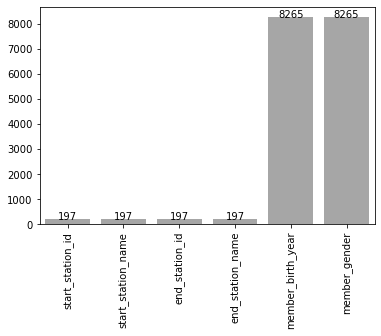

In [10]:
sb.barplot(mis_counts.index.values, mis_counts, color='grey', alpha = .7)

#Get the current tick locations and labels
plt.xticks(rotation=90) 

#Logic to print value on each bar
for i in range (mis_counts.shape[0]):
    count = mis_counts[i]
    plt.text(i, count+300, count, ha = 'center', va='top')

In [11]:
#Count values for user type
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [12]:
#Count values for gender
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

### Quality issues
-  remove the columns that have no value to our analysis (`start_station_latitude`, `start_station_longitude`, `end_station_latitude` and `end_station_longitude`
- `start_station_id`, `end_station_id` and `bike_id` are integer and not a string type  
- `start_time` and `end_time` have incorrect data type. It should be a 'datetime' data type   
- `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year`, `member_gender` have missing values  

### Tidiness issues
- not detected

### The structure of the dataset

There are 183,412 rows in the dataset with 16 features (9 numeric and 7 categorical types). Some of the features have incorect data type which we change in **Cleaning** part. Also I will remove features that are not of interest for subsequent analysis.

### The main features of interest in the dataset

In this analysis, the main interest is the data associated with the user, as well as the features associated with the movement of the users. I find it useful to have get an information about the most popular stations, user routes, and the hours and days of the week when users are most active in rental.

### The features in the dataset which will help support  investigation into us features of interest

I suppose that the feature describing the characteristics of users can be helpful, and besides that, the columns such as duration, date and time of the beginning of the journey, and, possibly, the name of the stations.

## Cleaning data

In [13]:
#Create a copy of the original dataframe
df_clean = df.copy()

##### Define   

- remove columns that are not of interest to our analysis (`start_station_latitude`, `start_station_longitude`, `end_station_latitude` and `end_station_longitude`   

##### Code

In [14]:
#Check the data before change
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [15]:
df_clean = df_clean.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1)

##### Test

In [16]:
#Check the data after change
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   end_station_id           183215 non-null  float64
 6   end_station_name         183215 non-null  object 
 7   bike_id                  183412 non-null  int64  
 8   user_type                183412 non-null  object 
 9   member_birth_year        175147 non-null  float64
 10  member_gender            175147 non-null  object 
 11  bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


##### Define   

- `start_station_id`, `end_station_id` and `bike_id` are integer and not a string type   

##### Code

In [17]:
#Check the data type of columns before change the data type
df_clean[['start_station_id', 'end_station_id','bike_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_station_id  183215 non-null  float64
 1   end_station_id    183215 non-null  float64
 2   bike_id           183412 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 4.2 MB


In [18]:
df_clean['start_station_id'] = df_clean['start_station_id'].astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('str')
df_clean['bike_id'] = df_clean['bike_id'].astype('str')

##### Test

In [19]:
#Check the data type of columns after change the data type
df_clean[['start_station_id', 'end_station_id','bike_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   start_station_id  183412 non-null  object
 1   end_station_id    183412 non-null  object
 2   bike_id           183412 non-null  object
dtypes: object(3)
memory usage: 4.2+ MB


##### Define   

- `start_time` and `end_time` have incorrect data type. Its should be datetime data type   

##### Code

In [20]:
#Check the data type of columns before change the data type
df_clean[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   start_time  183412 non-null  object
 1   end_time    183412 non-null  object
dtypes: object(2)
memory usage: 2.8+ MB


In [21]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

##### Test

In [22]:
#Check the data type of columns after change the data type
df_clean[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_time  183412 non-null  datetime64[ns]
 1   end_time    183412 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.8 MB


##### Define   

- `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year`, `member_gender` have missing values      

##### Code

In [23]:
#Dataframe size before changes
df_clean.shape

(183412, 12)

In [24]:
#Check on missing values
df_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
end_station_id                0
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [25]:
df_clean.dropna(axis = 0, inplace = True)

##### Test

In [26]:
#Dataframe size after changes
df_clean.shape

(174952, 12)

In [27]:
#Check on missing values
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

## Storing clean data into a CSV file

In [28]:
df_clean.to_csv('project_files/clean-201902-fordgobike-tripdata.csv', index=False)

### Let's take a quick look at our data before we start analyzing and visualizing.

In [29]:
#Show the header of full dataframe
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


In [30]:
#Dataframe size
df_clean.shape

(174952, 12)

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  object        
 9   member_birth_year        174952 non-null  float64       
 10  member_gender            174952 non-null  object        
 11  bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns

In [32]:
print('Minimum start time ride:', df_clean['start_time'].min()) 
print('Maximum start time trip:', df_clean['start_time'].max()) 

Minimum start time ride: 2019-02-01 00:00:20.636000
Maximum start time trip: 2019-02-28 23:59:18.548000


In [33]:
print('Minimum end time ride:', df_clean['end_time'].min())
print('Maximum end time trip:', df_clean['end_time'].max()) 

Minimum end time ride: 2019-02-01 00:04:52.058000
Maximum end time trip: 2019-03-01 08:01:55.975000


## Univariate Exploration

**Questions that we will try to answer with the univariate exploration:**   

- Figure out the percentages of the user types in our dataset   
- Take a look at the genders of users and their percentage   
- Top 20 most common years of birth of users
- Calculate top 20 most common user ages
- Find the most frequent duration times of most trips   
- Top 10 most popular start stations
- Top 10 most popular end stations

**Q1: Figure out the percentages of the user type in our dataset**   
To answer this question, let's create a pie chart with different values of user type as a percentage ratio 

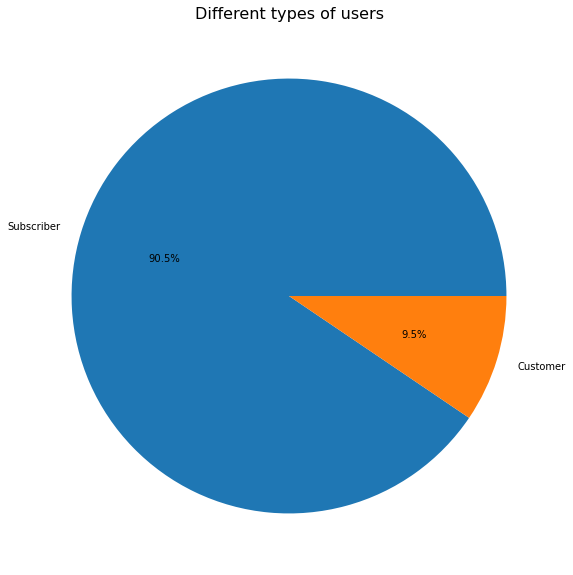

In [34]:
#Create a pie plot with the different percentages of user type
df_clean.user_type.value_counts().plot.pie(autopct = '%1.1f%%', figsize = (10,10));
plt.title('Different types of users', size = 16)
plt.ylabel('')
plt.show()

We can see that a huge part is occupied by **Subscriber users: 90.5%** and only **9.5% are Customer users**

**Q2: Let's take a look at the genders of users and their percentage**   
Let's use the Seaborn library for this purpose

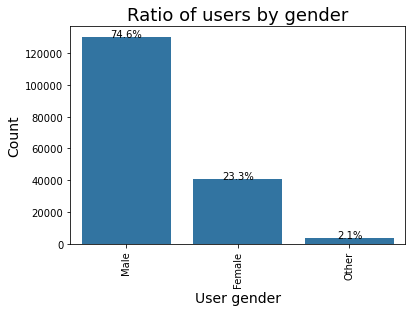

In [35]:
n_gender = df_clean['member_gender'].value_counts().sum()
type_counts = df_clean['member_gender'].value_counts()
type_order = type_counts.index

base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'member_gender', color = base_color, order = type_order);
type_counts = df_clean['member_gender'].value_counts()
locs, labels = plt.xticks(rotation = 90) 

#loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    g_string = '{:0.1f}%'.format(100 * count / n_gender)

    # print the annotation just below the top of the bar
    plt.text(loc, count + 2, g_string, ha = 'center', color = 'black')
    
plt.xlabel('User gender', size = 14);
plt.ylabel('Count', size = 14);
plt.title('Ratio of users by gender', size = 18);

Users with gender 'Male' take up most of the dataset. But we also see a small percentage of 'Other' genders.

**Q3: Top 20 most common years of birth of users**   
To answer this question, we need a column with the user's year of birth. Look at the top 20 years of the user's birth in numbers and then plot a graph.

In [36]:
df_clean['member_birth_year'].value_counts().head(20)

1988.0    10214
1993.0     9323
1989.0     8967
1990.0     8640
1991.0     8484
1992.0     8245
1987.0     8010
1986.0     7953
1994.0     7654
1995.0     7420
1985.0     7023
1984.0     6557
1983.0     5953
1980.0     5011
1982.0     4987
1996.0     4637
1981.0     4344
1979.0     3756
1997.0     3476
1998.0     3208
Name: member_birth_year, dtype: int64

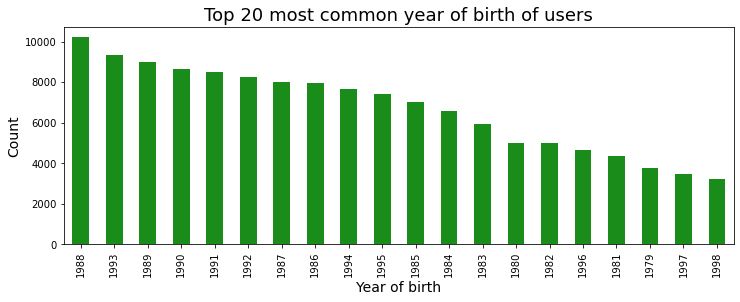

In [59]:
#Change the data type of column 'member_birth_year' for a more suitable 
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int')

#Create hist for column 'member_birth_year'
df_clean['member_birth_year'].value_counts()[:20].plot(kind = 'bar', color = 'g', alpha = .9);
plt.xlabel('Year of birth', size = 14);
plt.ylabel('Count', size = 14);
plt.title('Top 20 most common year of birth of users', size = 18);

from matplotlib import rcParams
#Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

We see that the leading position in the TOP-20 of the most common birth years of users belongs to **1988**, i.e. users who are **31 years old**.   
But there is another way to find out the age of the user, consider this in the next question.

**Q4: An alternative ascertainment of the age of users (Top 20 most common user ages)**   
Make simple data manipulations. Let's subtract the user's year of birth from the given year of data collection and visualize the result.

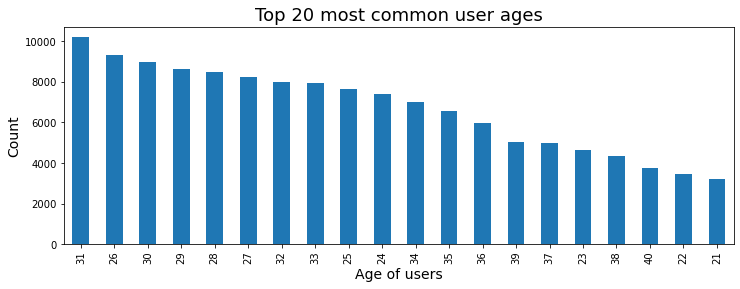

In [38]:
user_age = (2019 - df_clean['member_birth_year']).value_counts()[:20].plot(kind='bar')
plt.xlabel('Age of users', size = 14);
plt.ylabel('Count', size = 14);
plt.title('Top 20 most common user ages', size = 18);

rcParams['figure.figsize'] = 12,4

As we foreseen in the previous question, the top 20 in our dataset is dominated by users aged **31**.

**Q5: Find the most frequent duration of the most trips**   
Let's create a display of duration data at normal scale. We will use plt.xlim to limit the schedule to 4000 seconds to eliminate outliers and our interest is the duration of most of the trips.

In [39]:
#Duration statistics
df_clean['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

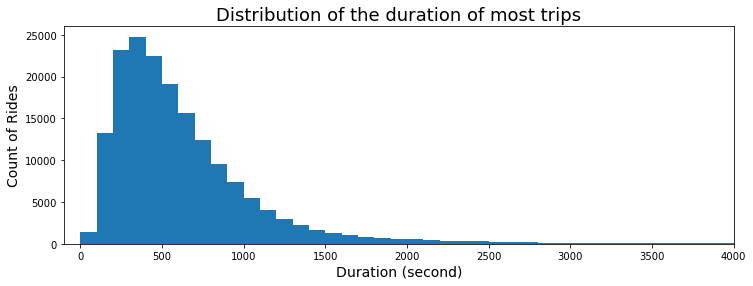

In [40]:
#Create a plot
bins = np.arange(0, df_clean['duration_sec'].max()+100, 100)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Distribution of the duration of most trips', size=18)
plt.ylabel('Count of Rides', size=14)
plt.xlabel('Duration (second)', size=14);
plt.xlim(-100,4000);

rcParams['figure.figsize'] = 12,4

As we can see, most of the trips take between 250 and 600 seconds or about 4 and 10 minutes. This suggests that users prefer short routes in terms of duration.   

Let's apply a transformation to our path length distribution graph for a more suitable display.

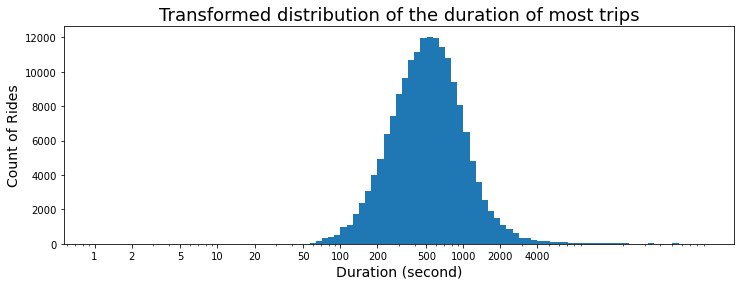

In [41]:
log_binsize = 0.050
bins = 10 ** np.arange(0, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 4000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks, labels);
plt.title('Transformed distribution of the duration of most trips', size=18)
plt.ylabel('Count of Rides', size=14)
plt.xlabel('Duration (second)', size=14);
rcParams['figure.figsize'] = 14,6

Now it looks like a normal distribution

**Q6: Top 10 most popular start stations**   
I think it's a good idea for business to find out the most popular stations. Let's visualize it using our data and bar graphs.

In [42]:
df_clean.start_station_name.value_counts().head(10)

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

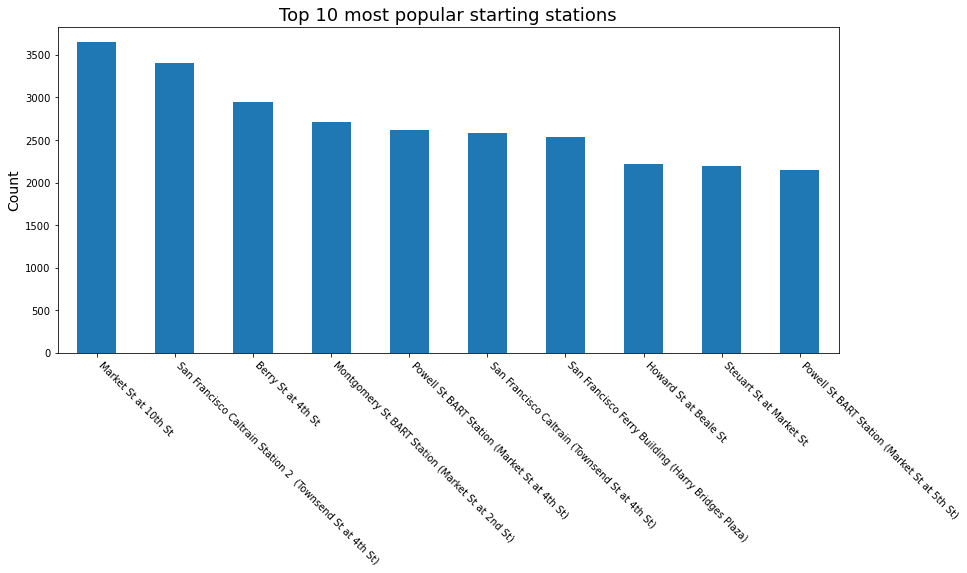

In [43]:
#Create plot with the top 10 most popular starting stations
df_clean.start_station_name.value_counts().head(10).plot(kind='bar', figsize=(14,6));
plt.xticks(rotation = "-45", ha = 'left');
plt.title('Top 10 most popular starting stations', size=18);
plt.ylabel('Count', size=14);

And the leading position in the list of 10 most popular starting stations is occupied by a station called 'Market St at 10th St' with a сount of 3649.

**Q7: Top 10 most popular end stations**   
Same as in the previous question we visualize the most popular destinations using our data and bar graphs.

In [44]:
df_clean.end_station_name.value_counts().head(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2782
The Embarcadero at Sansome St                                2341
Steuart St at Market St                                      2264
Powell St BART Station (Market St at 5th St)                 2153
Name: end_station_name, dtype: int64

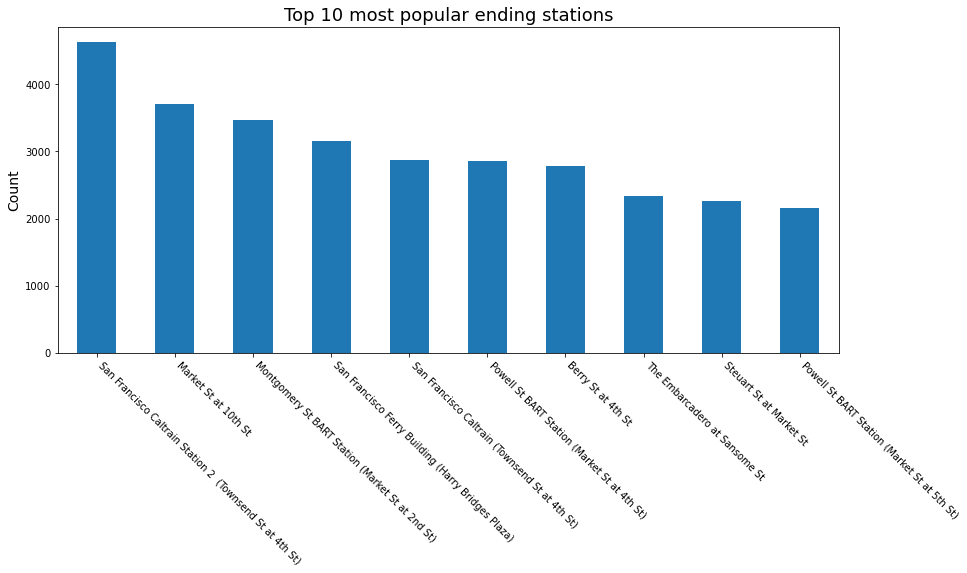

In [45]:
#Create plot with the top 10 most popular ending stations
df_clean.end_station_name.value_counts().head(10).plot(kind='bar', figsize=(14,6));
plt.xticks(rotation = "-45", ha = 'left');
plt.title('Top 10 most popular ending stations', size=18);
plt.ylabel('Count', size=14);

As a result, we found out the leading position in the list of 10 most popular stations to end the trip is occupied by a station called 'San Francisco Caltrain Station 2  (Townsend St at 4th St)' with a сount of 4624.

## Bivariate Exploration

In the previous section, we performed a univariate exploration of our variables. Let's now do a bivariate exploration of these variables in terms of relationships with each other. We will investigate the following questions:   

- Average travel time of users by gender   
- Average travel time of users by type (Subscriber/Customer)   
- Count of rides by hour, weekday by user type

**Q1: Average travel time of users by gender**   
First of all, let's look at the statistics of the trip duration column to further select the range for plotting to avoid outliers. We can do this since the main purpose of this question is to display averages, not boundaries.

In [46]:
df_clean['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [47]:
df_clean2 = df_clean.query('duration_sec < 4000')

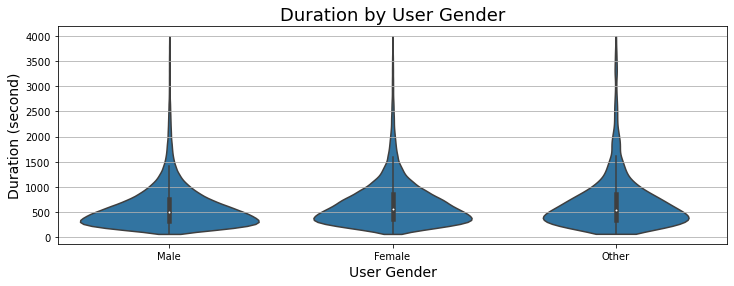

In [60]:
fontsize = 16
fig, axes = plt.subplots()

sb.violinplot('member_gender','duration_sec', data=df_clean2,  color=base_color, cut=0)
axes.set_title('Duration by User Gender', size=18)
axes.yaxis.grid(True)
axes.set_xlabel('User Gender', size=14)
axes.set_ylabel('Duration (second)', size=14)

plt.show()

On this graph we can clearly see that Male users in general have shorter trip duration, than Female and Other users.

**Q2: Average travel time of users by type (Subscriber/Customer)**   
Let's use a seaborn boxplot() function for this task. The box plot is useful when it comes to summarizing data for numeric values at each categorical level.

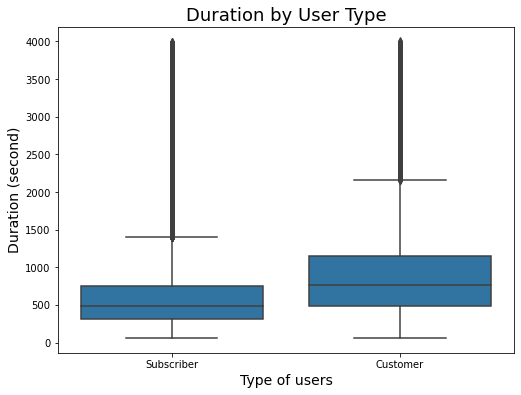

In [61]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [18,6])

plt.subplot(1,2,1)
sb.boxplot(data= df_clean2, x='user_type', y='duration_sec', color= base_color);
plt.title('Duration by User Type', size=18)
plt.xlabel('Type of users', size=14);
plt.ylabel('Duration (second)', size=14);

Now we can make a conclusion that Subscribers usually use bicycles for much shorter trips than Customers.

**Q3: Count of rides by hour / weekday by user type**   
First, we need the Pandas library to extract the hour and day from the available travel start date column. Then, based on the received data, we will create the necessary plots using the Seaborn library.

In [50]:
df_clean['start_hour'] = df_clean['start_time'].dt.hour
df_clean['start_weekday'] = df_clean['start_time'].dt.dayofweek

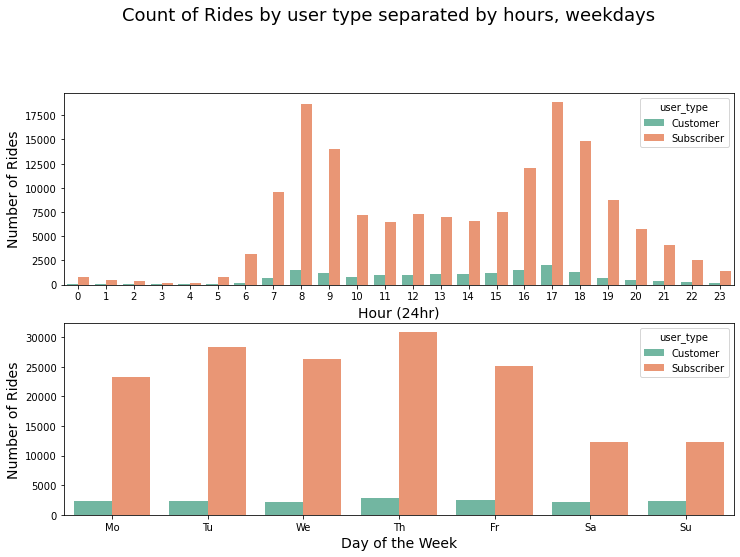

In [51]:
fig = plt.figure(figsize=[12,12])
fig.suptitle('Count of Rides by user type separated by hours, weekdays', fontsize=18)

plt.subplot(3,1,1)
sb.countplot(data = df_clean, x = 'start_hour', hue = 'user_type',  palette = 'Set2')
plt.ylabel('Number of Rides', size=14)
plt.xlabel('Hour (24hr)', size=14)

ax = plt.subplot(3,1,2)
sb.countplot(data = df_clean, x = 'start_weekday', hue = 'user_type', palette = 'Set2')
day_index = [0, 1, 2, 3, 4, 5, 6]
days = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']
plt.xticks(day_index, days)
plt.xlabel('Day of the Week', size=14)
plt.ylabel('Number of Rides', size=14)

plt.show()

So now on the first graph we can see that regardless of the user type the most popular time to pick up the bike is around 8 and 17 o'clock. Based on this we can conclude that majority of people use this service to get to their work place and back.   
On the second graph there's also a similar distribution between two user types and the busiest day is Thursday, which is quite unexpected.

## Multivariate Exploration

Based on the data obtained in the previous two studies, in the multivariate exploration we will try to find out:   
- The relationship of the length of the journey with the age of the user by dividing the users into categories using the shape method.   
- Top 10 of the most popular routes used by users, which can suggest where to add rental points or increase those available during the tourist season.

Before proceeding with a multivariate exploration of the intended questions, let's check programmatically if we have missed any correlation in our data.

In [52]:
correl = df_clean.corr()
print(correl)

                   duration_sec  member_birth_year  start_hour  start_weekday
duration_sec           1.000000          -0.006041    0.006118       0.029029
member_birth_year     -0.006041           1.000000    0.064126       0.034409
start_hour             0.006118           0.064126    1.000000       0.021187
start_weekday          0.029029           0.034409    0.021187       1.000000


So, as we can see, we have not missed anything and there is no correlation in our data.

**Q1: The relationship of the length of the journey with the age of the user by dividing the users into categories using the shape method**   
Let's create a list with the age of the users to extract data from the data by means of the available year of birth. After we create a graph of the relationship, we will use a scatter plot.

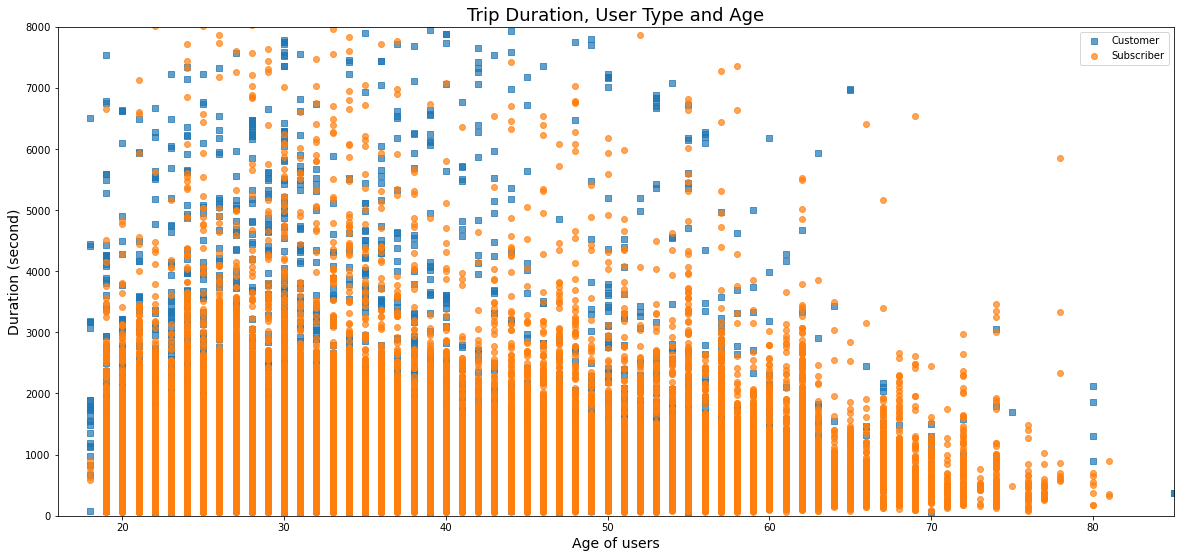

In [53]:
#Create list of user age
df_clean['user_age'] = 2019 - df['member_birth_year']

plt.figure(figsize=[20,9])
type_mark = [['Customer', 's'], 
            ['Subscriber', 'o']]

for user_type, marker in type_mark:
    user = df_clean[df_clean['user_type'] == user_type]
    plt.scatter(user['user_age'], user['duration_sec'], marker = marker, alpha= .7)
    
plt.legend(['Customer', 'Subscriber'])
plt.axis([16, 85, 0, 8000 ])
plt.title('Trip Duration, User Type and Age', size = 18)
plt.xlabel('Age of users', size = 14)
plt.ylabel('Duration (second)', size = 14)

plt.show()

Based on the graph we can conclude that trip duration for Subscrbers is almost equally distributed up to age of 63 years and then decreases. For Customers the diference is more noticable and the longest rides are by users if ages between 20 and 40. We can also see that Customers have more long trips than Subscribers, which we also observed on a box plot previously.

**Top 10 most popular routes used by users**   
First, we need to create a new data frame with the data we are interested in. Let's take a look at the top 10 programmatically and then create a graph.

In [54]:
#Creating an object with data of interest by adding a column to count them
data = df_clean.groupby(['start_station_name', 'end_station_name']).size()

In [55]:
#Transformation of an object into a dataframe
new_df = data.to_frame(name = 'size').reset_index()

In [56]:
#Sort the dataframe by the largest number of repetitions, limit 10
new_df.sort_values(by='size', ascending=False)[:10]

,start_station_name,end_station_name,size
5861,Berry St at 4th St,San Francisco Ferry Building (Harry Bridges Pl...,327
11018,Grand Ave at Perkins St,19th Street BART Station,308
18835,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St,286
1750,19th Street BART Station,Grand Ave at Perkins St,283
20760,The Embarcadero at Sansome St,Steuart St at Market St,282
21192,Townsend St at 7th St,San Francisco Caltrain Station 2 (Townsend St...,260
18273,San Fernando St at 7th St,5th St at Virginia St,249
14168,Market St at 10th St,Montgomery St BART Station (Market St at 2nd St),243
4515,5th St at Virginia St,San Fernando St at 7th St,242
14185,Market St at 10th St,San Francisco Caltrain Station 2 (Townsend St...,232


And now, having received the necessary data, we can create a plot of the Top 10 most popular routes used by users. Using two categorical variables ('start_station_name' and 'end_station_name') and one numeric ('size').

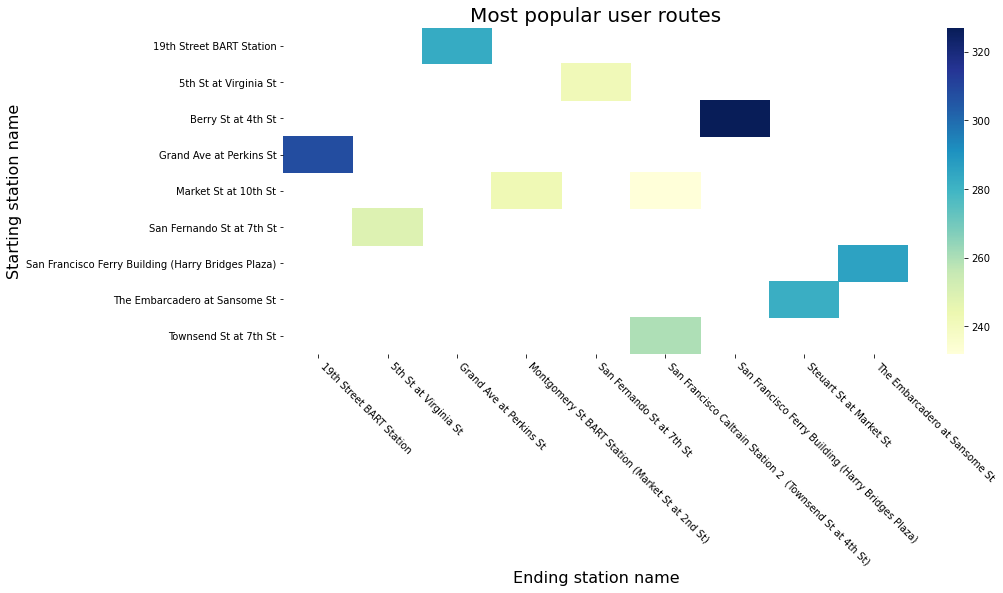

In [57]:
count_top10 = new_df.sort_values(by='size', ascending=False)[:10]
route = count_top10.pivot('start_station_name', 'end_station_name', 'size')

ax = sb.heatmap(route, cmap="YlGnBu")
plt.xticks(rotation = "-45", ha = 'left');
plt.title('Most popular user routes', size = 20)
plt.xlabel('Ending station name', size = 16)
plt.ylabel('Starting station name', size = 16)

plt.show()

We can see that the most popular route is from 'Berry St at 4th St' to 'San Francisco Ferry Building (Harry Bridges Plaza)' with the count of 327 rides.